In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

For verficiation as file was not running properly

In [46]:
import pandas as pd

try:
    df = pd.read_csv(r"E:\Practice Set\Superstore.csv", encoding='latin1') 
    print("File loaded successfully with latin1 encoding!")
except Exception as e:
    print(f"Error: {e}")

File loaded successfully with latin1 encoding!


In [47]:
import pandas as pd

df = pd.read_csv(r"E:\Practice Set\Superstore.csv", encoding='latin1', engine='python')
print("CSV loaded successfully!")

CSV loaded successfully!


In [48]:
# df = pd.read_csv(r"E:\Practice Set\Sample - Superstore.csv")
df = pd.read_csv(r"E:\Practice Set\Superstore.csv", encoding='latin1') 

## Objectives
Clean the dataset:
1.Fix date formats 

2.Handle missing/null values

3.Standardize inconsistent text fields (e.g., product names)

4.Perform basic EDA and generate 3 actionable insights.

5.Detect outliers in the sales column and justify your detection method.

6.Visualize at least 3 insights using charts.


In [49]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [56]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [50]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [51]:
df.columns.value_counts()

Row ID           1
Order ID         1
Order Date       1
Ship Date        1
Ship Mode        1
Customer ID      1
Customer Name    1
Segment          1
Country          1
City             1
State            1
Postal Code      1
Region           1
Product ID       1
Category         1
Sub-Category     1
Product Name     1
Sales            1
Quantity         1
Discount         1
Profit           1
Name: count, dtype: int64

# Clean the Dataset
1. Fix Date Formats

In [62]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

print(df[['Order Date', 'Ship Date']].dtypes)
newDate = df[['Order Date', 'Ship Date']].head(21)

Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object


In [63]:
print(newDate)

   Order Date  Ship Date
0  2016-11-08 2016-11-11
1  2016-11-08 2016-11-11
2  2016-06-12 2016-06-16
3  2015-10-11 2015-10-18
4  2015-10-11 2015-10-18
5  2014-06-09 2014-06-14
6  2014-06-09 2014-06-14
7  2014-06-09 2014-06-14
8  2014-06-09 2014-06-14
9  2014-06-09 2014-06-14
10 2014-06-09 2014-06-14
11 2014-06-09 2014-06-14
12 2017-04-15 2017-04-20
13 2016-12-05 2016-12-10
14 2015-11-22 2015-11-26
15 2015-11-22 2015-11-26
16 2014-11-11 2014-11-18
17 2014-05-13 2014-05-15
18 2014-08-27 2014-09-01
19 2014-08-27 2014-09-01
20 2014-08-27 2014-09-01


2. Handle Missing/Null Values

In [26]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Show rows with any missing values (if any)
df[df.isnull().any(axis=1)]

Missing values per column:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


<Axes: >

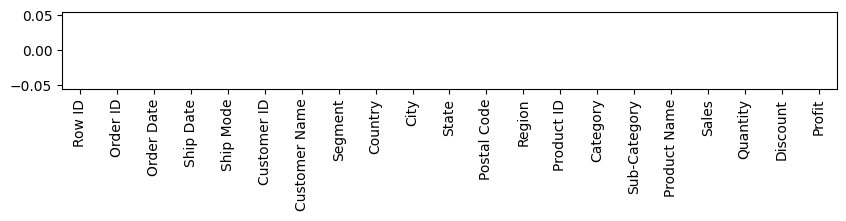

In [ ]:
# Plotting a graph for it
df.isnull().sum().plot(kind="bar", figsize=(10,1))
# if we have missing data in column it will be shown in the bar chart

3. Standardize Inconsistent Text Fields

In [58]:
text_columns = ['Product Name', 'Category', 'Sub-Category', 'Customer Name']

for col in text_columns:
    df[col] = df[col].str.strip().str.title()

# Check the result for a few rows
df[text_columns].head(21)

,Product Name,Category,Sub-Category,Customer Name
0,Bush Somerset Collection Bookcase,Furniture,Bookcases,Claire Gute
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs,Claire Gute
2,Self-Adhesive Address Labels For Typewriters B...,Office Supplies,Labels,Darrin Van Huff
3,Bretford Cr4500 Series Slim Rectangular Table,Furniture,Tables,Sean O'Donnell
4,Eldon Fold 'N Roll Cart System,Office Supplies,Storage,Sean O'Donnell
5,Eldon Expressions Wood And Plastic Desk Access...,Furniture,Furnishings,Brosina Hoffman
6,Newell 322,Office Supplies,Art,Brosina Hoffman
7,Mitel 5320 Ip Phone Voip Phone,Technology,Phones,Brosina Hoffman
8,Dxl Angle-View Binders With Locking Rings By S...,Office Supplies,Binders,Brosina Hoffman
9,Belkin F5C206Vtel 6 Outlet Surge,Office Supplies,Appliances,Brosina Hoffman


# Perform Basic EDA & Generate 3 Actionable Insights
Sales by Category
Profit by Region
Top 10 Products by Sales


In [18]:
# 1. Total Sales by Category
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("Total Sales by Category:\n", sales_by_category)

# 2. Total Profit by Region
profit_by_region = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
print("\nTotal Profit by Region:\n", profit_by_region)

# 3. Top 10 Products by Sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Sales:\n", top_products)

Total Sales by Category:
 Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

Total Profit by Region:
 Region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: Profit, dtype: float64

Top 10 Products by Sales:
 Product Name
Canon Imageclass 2200 Advanced Copier                                          61599.824
Fellowes Pb500 Electric Punch Plastic Comb Binding Machine With Manual Bind    27453.384
Cisco Telepresence System Ex90 Videoconferencing Unit                          22638.480
Hon 5400 Series Task Chairs For Big And Tall                                   21870.576
Gbc Docubind Tl300 Electric Binding System                                     19823.479
Gbc Ibimaster 500 Manual Proclick Binding System                               19024.500
Hewlett Packard Laserjet 3310 Copier                                           18839.686
Hp Designjet T520 Inkjet L

Detect Outliers in the Sales Column and Justify the Method

In [ ]:
# Detect outliers in the 'Sales' column using the IQR method
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]

print(f"Number of outliers in 'Sales': {outliers.shape[0]}")
print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
print("\nSample outliers:")
display(outliers[['Sales', 'Product Name', 'Category', 'Region']].head())

# Justification:
print("\nJustification: The IQR method is used because it is robust to non-normal distributions and less sensitive to extreme values than the Z-score method. Suitable for sales data with outliers.")

Number of outliers in 'Sales': 1167
Lower bound: -271.71, Upper bound: 498.93

Sample outliers:


,Sales,Product Name,Category,Region
1,731.9400,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,South
3,957.5775,Bretford Cr4500 Series Slim Rectangular Table,Furniture,South
7,907.1520,Mitel 5320 Ip Phone Voip Phone,Technology,West
10,1706.1840,Chromcraft Rectangular Conference Tables,Furniture,West
11,911.4240,Konftel 250 Conference Phone - Charcoal Black,Technology,West



Justification: The IQR method is used because it is robust to non-normal distributions and less sensitive to extreme values than the Z-score method. It is suitable for sales data, which often contains skewed distributions and natural variability.


Visualize at Least 3 Insights Using Charts

Sales by Category (Bar Chart)


C:\Users\HP\AppData\Local\Temp\ipykernel_23420\2124083470.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette="viridis")


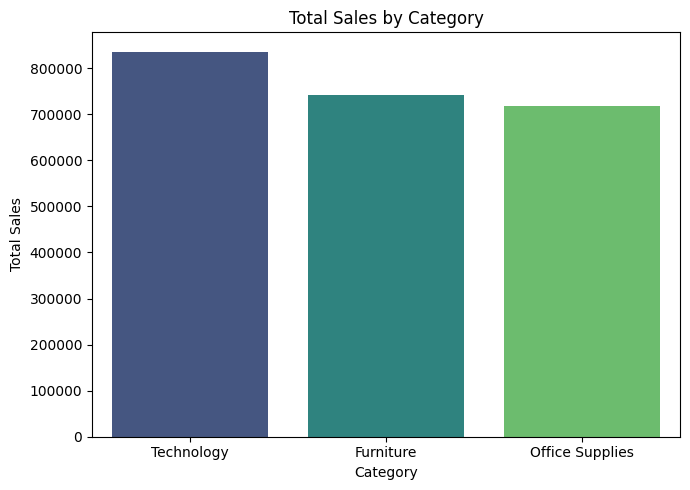

In [30]:
# 1. Sales by Category
plt.figure(figsize=(7, 5))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette="viridis")
plt.title('Total Sales by Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_23420\161391815.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_region.index, y=profit_by_region.values, palette="magma")


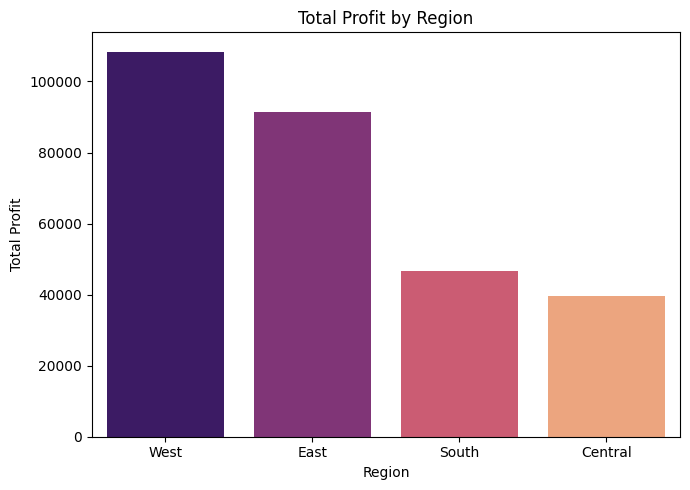

In [31]:
# 2. Profit by Region
plt.figure(figsize=(7, 5))
sns.barplot(x=profit_by_region.index, y=profit_by_region.values, palette="magma")
plt.title('Total Profit by Region')
plt.ylabel('Total Profit')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_23420\1766137229.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


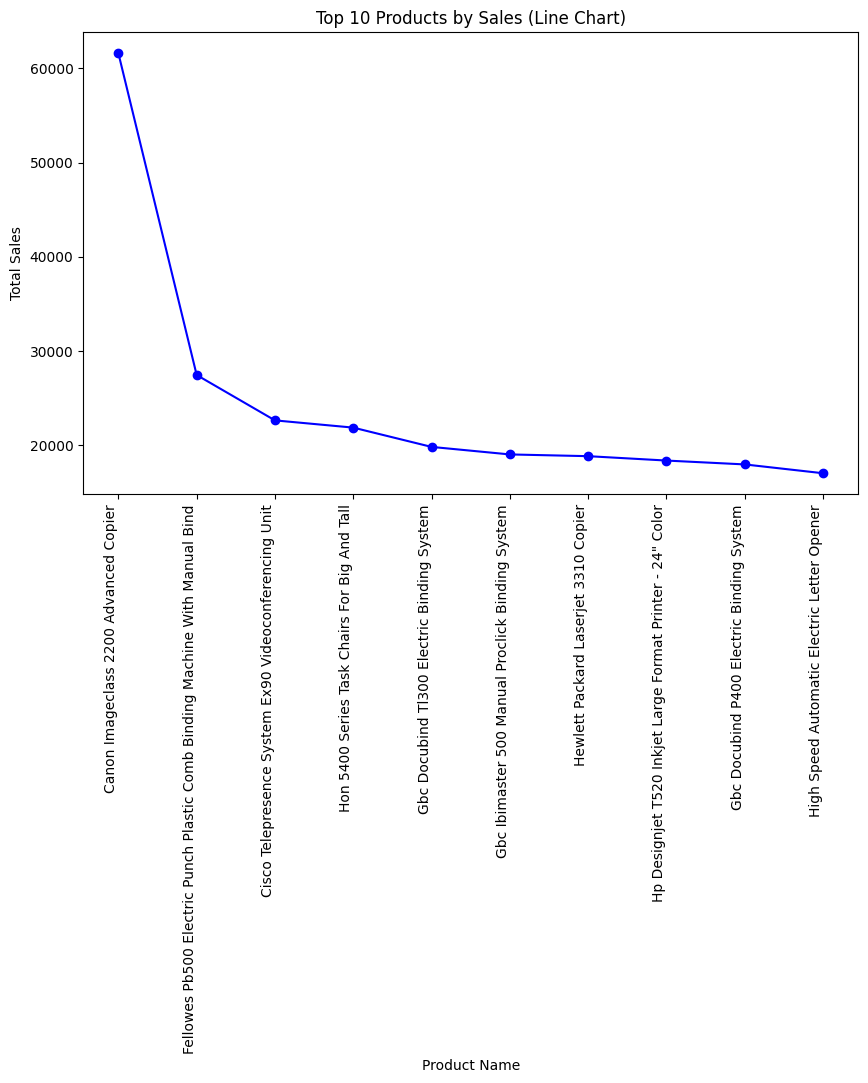

In [ ]:
# 3. Line chart for Top 10 Products by Sales
plt.figure(figsize=(10, 6))
plt.plot(top_products.index, top_products.values, marker='o', linestyle='-', color='b')
plt.title('Top 10 Products by Sales (Line Chart)')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()